In [1]:
import Unet
from tensorflow.keras.callbacks import ModelCheckpoint
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
# data_gen_args = dict()
my_generator = Unet.trainGenerator(10,
                                     "./data/",
                                     "ImageSets",
                                     "LabelsSegmentationClass",
                                     data_gen_args,
                                     mask_color_mode = "rgb",
                                     image_color_mode="rgb",
                                     num_class=2,
                                     save_to_dir="./aug")
model = Unet.Unet(channels=3)
model_checkpoint = ModelCheckpoint("./data/savetest06.hdf5", monitor="loss", verbose=1, save_best_only=True)
# model.summary()
history = model.fit(my_generator, steps_per_epoch=100, epochs=10, callbacks=[model_checkpoint]) # , callbacks=[model_checkpoint]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
 99/100 [============================>.] - ETA: 0s - loss: 0.0554 - acc: 0.0043
Epoch 00001: loss improved from inf to 0.05549, saving model to ./data/savetest06.hdf5
100/100 [==============================] - 59s 591ms/step - loss: 0.0555 - acc: 0.0044
Epoch 2/10
 99/100 [============================>.] - ETA: 0s - loss: 0.0551 - acc: 0.0048
Epoch 00002: loss improved from 0.05549 to 0.05500, saving model to ./data/savetest06.hdf5
100/100 [==============================] - 55s 550ms/step - loss: 0.0550 - acc: 0.0048
Epoch 3/10
 99/100 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.0053
Ep

In [2]:
my_generator = Unet.trainGenerator(1,
                                     "./data/",
                                     "ImageSets",
                                     "LabelsSegmentationClass",
                                     data_gen_args,
                                     save_to_dir="./aug")
num_batch = 3
for i,batch in enumerate(my_generator):
    if(i >= num_batch):
        break

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


In [23]:
import Unet
model = Unet.Unet(pretrained_weights="./data/savetest06.hdf5", channels = 3)
model_checkpoint = ModelCheckpoint("./data/savetest07.hdf5", monitor="loss", verbose=1)
history = model.fit(my_generator, steps_per_epoch=100, epochs=20, callbacks=[model_checkpoint]) # callbacks=[model_checkpoint]

Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.4139
Epoch 00001: saving model to ./data/savetest07.hdf5
100/100 [==============================] - 59s 594ms/step - loss: 0.0521 - acc: 0.4143
Epoch 2/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.4285
Epoch 00002: saving model to ./data/savetest07.hdf5
100/100 [==============================] - 60s 603ms/step - loss: 0.0521 - acc: 0.4286
Epoch 3/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0520 - acc: 0.4423
Epoch 00003: saving model to ./data/savetest07.hdf5
100/100 [==============================] - 97s 966ms/step - loss: 0.0520 - acc: 0.4420
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0522 - acc: 0.4557
Epoch 00004: saving model to ./data/savetest07.hdf5
100/100 [==============================] - 70s 700ms/step - loss: 0.0519 - acc: 0.4562
Epoch 5/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0518 - a

<Figure size 18000x12000 with 0 Axes>

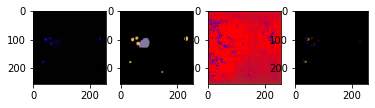

In [25]:
# import Unet
# model = Unet.Unet(pretrained_weights="./data/savetest05.hdf5", channels = 3)

import matplotlib.pyplot as plt
import cv2
import numpy as np
str = "Snap-1861"
image = cv2.imread("./data/ImageSets/{}.bmp".format(str), cv2.COLOR_BGR2RGB) # cv2.IMREAD_GRAYSCALE
image = cv2.resize(image, (256,256))
plt.figure(figsize=(120, 80), dpi=150)
fig, ax = plt.subplots(1, 4)
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image = cv2.imread("./data/LabelsSegmentationClass/{}.png".format(str), cv2.COLOR_BGR2RGB) # cv2.IMREAD_GRAYSCALE
image = cv2.resize(image, (256,256))
ax[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image = cv2.imread("./data/ImageSets/{}.bmp".format(str), cv2.COLOR_BGR2RGB) # , cv2.COLOR_BGR2RGB
image = cv2.resize(image, (256,256))
image = image.reshape(1, 256, 256, 3)
image.shape
image = model.predict(image)
image = image.reshape(256, 256, 3)
ax[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
Dying_cells = [111, 10, 235]
Cells = [235, 175, 10]
Some_else = [255, 0, 255]
COLOR_DICT = np.array([Cells, Dying_cells])
image = Unet.labelVisualize(2, COLOR_DICT, image)
ax[3].imshow(image)

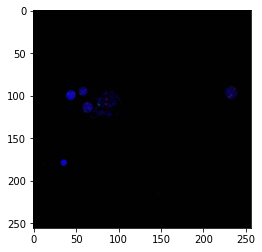

In [26]:
import matplotlib.pyplot as plt
import cv2
image = cv2.imread("./data/ImageSets/Snap-1861.bmp")
image = cv2.resize(image, (256,256))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

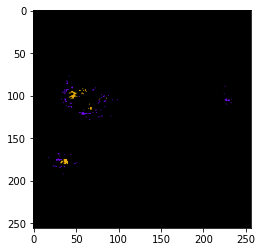

In [27]:
import matplotlib.pyplot as plt
import cv2
import Unet
image = cv2.imread("./data/ImageSets/Snap-1861.bmp", cv2.COLOR_BGR2RGB) # cv2.IMREAD_GRAYSCALE
image = cv2.resize(image, (256,256))
image = image.reshape(1, 256, 256, 3)
image.shape
image = model.predict(image)
image = image.reshape(256, 256, 3)
image = Unet.labelVisualize(2, COLOR_DICT, image)
plt.imshow(image)
plt.imsave("saved.png", image)